<a href="https://colab.research.google.com/github/vanand102/Springboard/blob/main/Capstone3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

**Mount Google Drive and import folder.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Springboard/Capstone 3')

Import pandas, matplotlib.pyplot, and seaborn in the correct lines below

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import seaborn as sns
from scipy.stats import stats
import os
import numpy as np


from library.sb_utils import save_file

**Import data**

In [4]:
diamond_data = pd.read_csv('/content/drive/MyDrive/Springboard/Capstone 3/diamond_data.csv')

In [5]:
diamond_data.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamond_data["price"].describe()

count    53920.000000
mean      3930.993231
std       3987.280446
min        326.000000
25%        949.000000
50%       2401.000000
75%       5323.250000
max      18823.000000
Name: price, dtype: float64

**Created a scatterplot to show where the carat falls for each data point in the dataset. Noted that there appear to be a few outliers at the top, but since they don't appear to be erroneous, I won't change them.**

<Axes: title={'center': 'Carat over each Data Point'}, xlabel='id', ylabel='carat'>

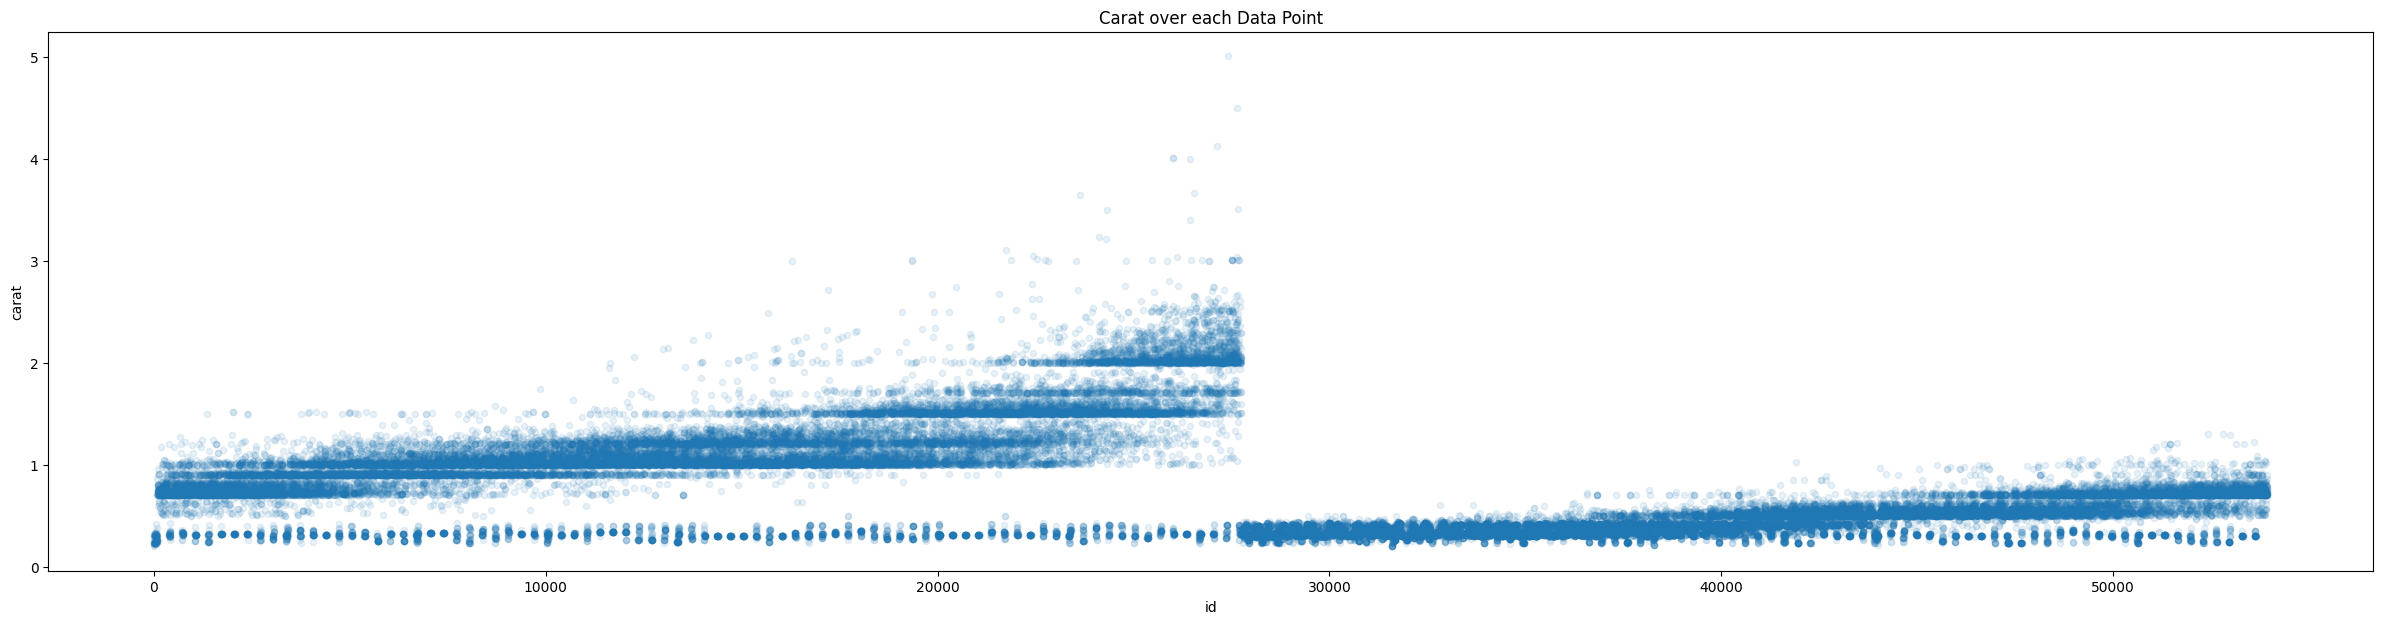

In [7]:
diamond_data[["id","carat"]].plot(kind = "scatter",x = "id",y = "carat", title = "Carat over each Data Point",figsize = (30,7), alpha=0.1)

**Created a scatterplot to show where the price falls for each data point in the dataset. Noted that the layout of the data points is similar to the layout of the previous scatterplot with the carats.**

<Axes: title={'center': 'Price over each Data Point'}, xlabel='id', ylabel='price'>

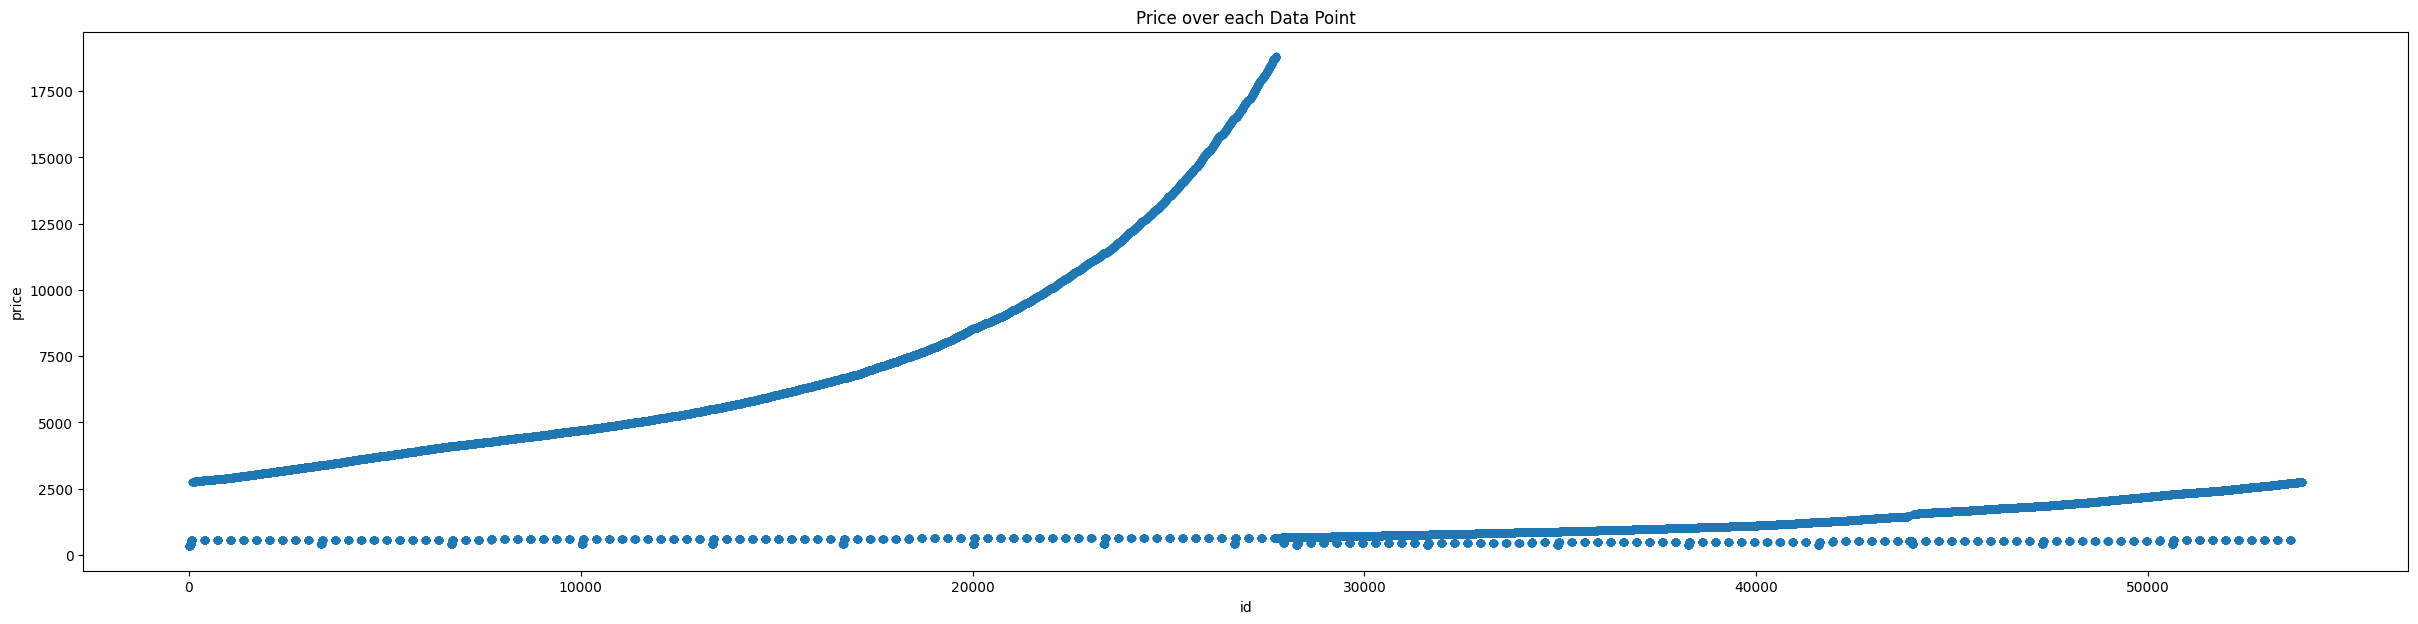

In [8]:
diamond_data[["id","price"]].plot(kind = "scatter",x = "id",y = "price", title = "Price over each Data Point", figsize = (30,7))

**Created a scatterplot to show where x falls for each data point in the dataset. Noted that the layout of the data points is similar to the layout of the previous scatterplots.**

<Axes: title={'center': 'x over each Data Point'}, xlabel='id', ylabel='x'>

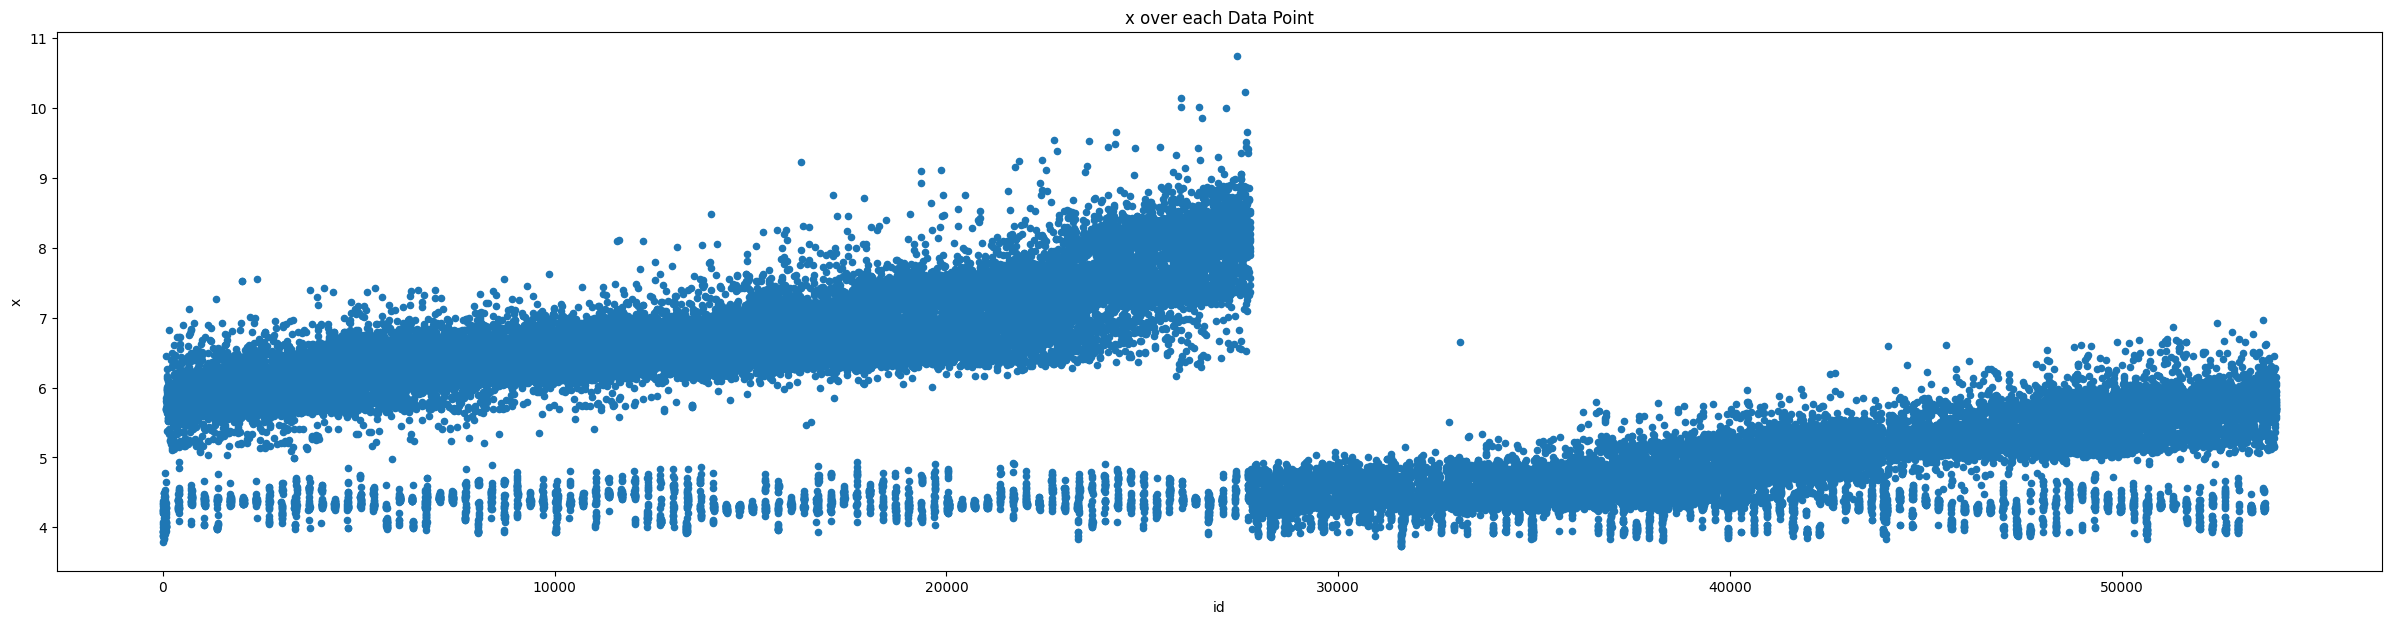

In [9]:
diamond_data[["id","x"]].plot(kind = "scatter",x = "id",y = "x", title = "x over each Data Point", figsize = (30,7))

**Created a scatterplot to show where y falls for each data point in the dataset. Noted that the layout of the data points is similar to the layout of the previous scatterplots.**

<Axes: title={'center': 'y over each Data Point'}, xlabel='id', ylabel='y'>

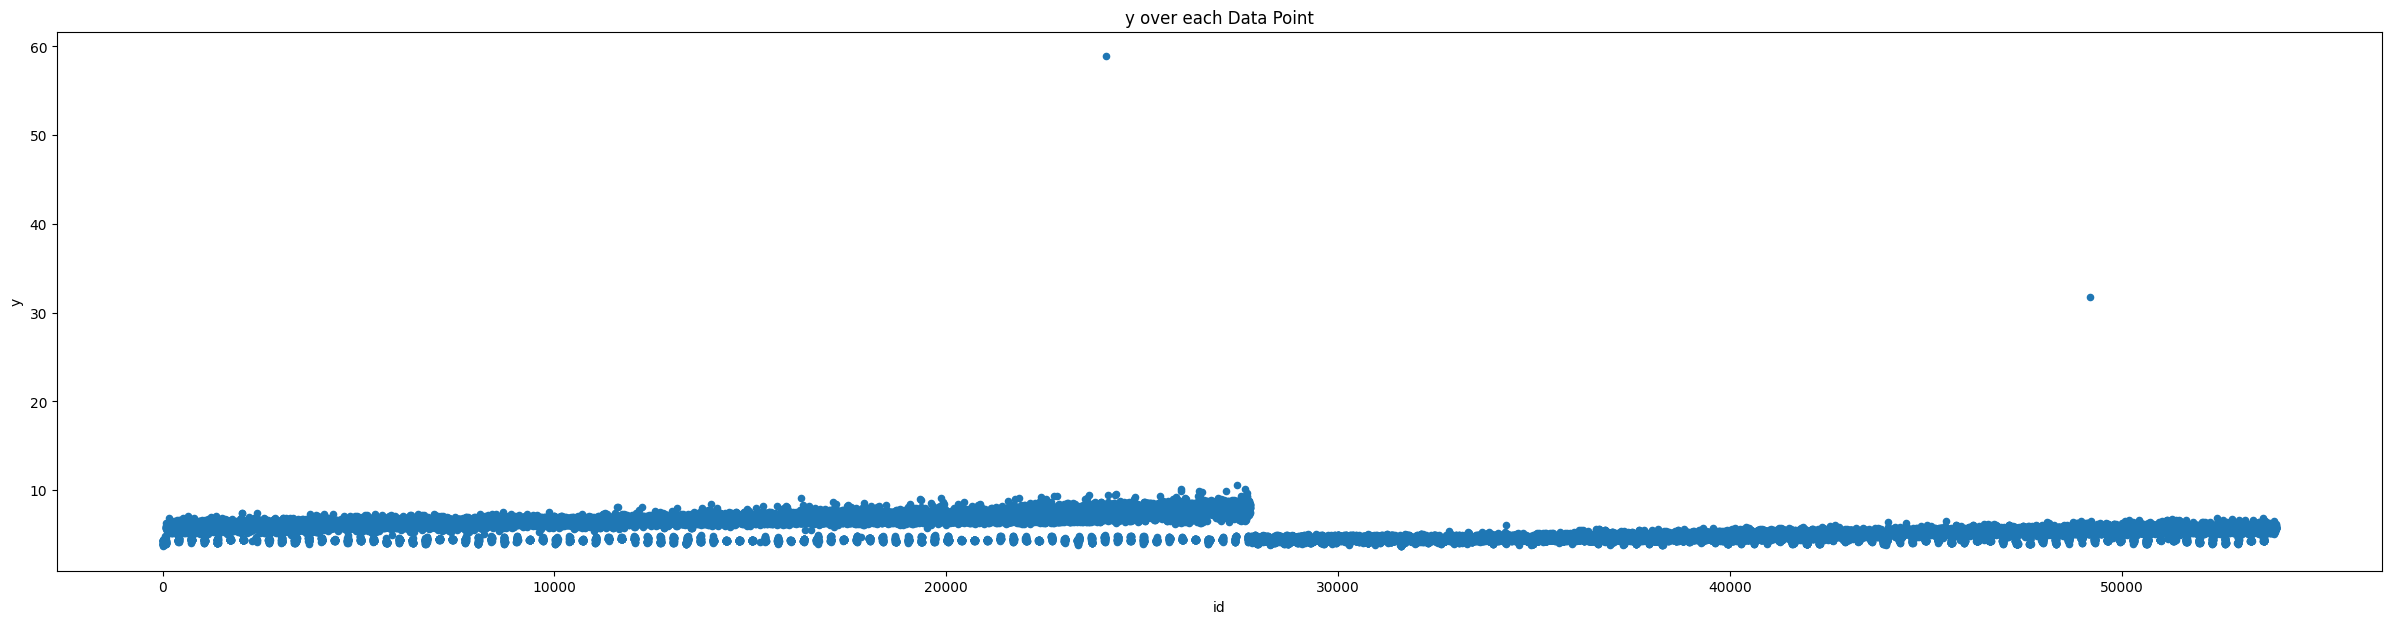

In [10]:
diamond_data[["id","y"]].plot(kind = "scatter",x = "id",y = "y", title = "y over each Data Point", figsize = (30,7))

**Removed outliers from y**

In [11]:
diamond_data = diamond_data[diamond_data["y"] < 20]

<Axes: title={'center': 'y over each Data Point'}, xlabel='id', ylabel='y'>

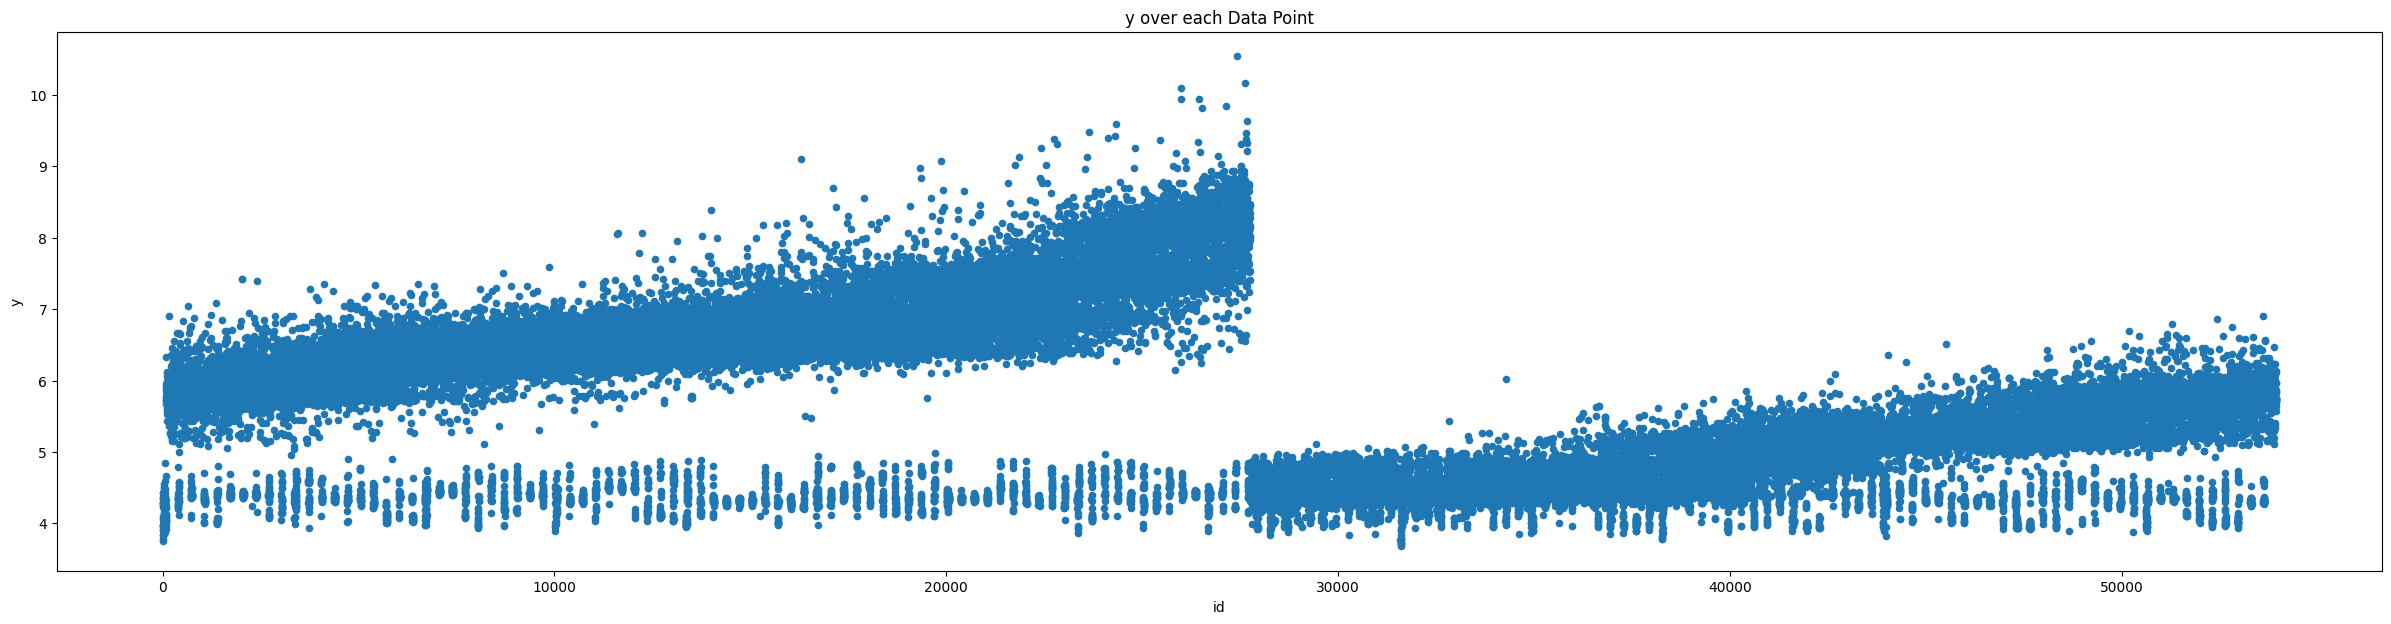

In [12]:
diamond_data[["id","y"]].plot(kind = "scatter",x = "id",y = "y", title = "y over each Data Point", figsize = (30,7))

**Created a scatterplot to show where z falls for each data point in the dataset. Noted that the layout of the data points is similar to the layout of the previous scatterplots.**

<Axes: title={'center': 'z over each Data Point'}, xlabel='id', ylabel='z'>

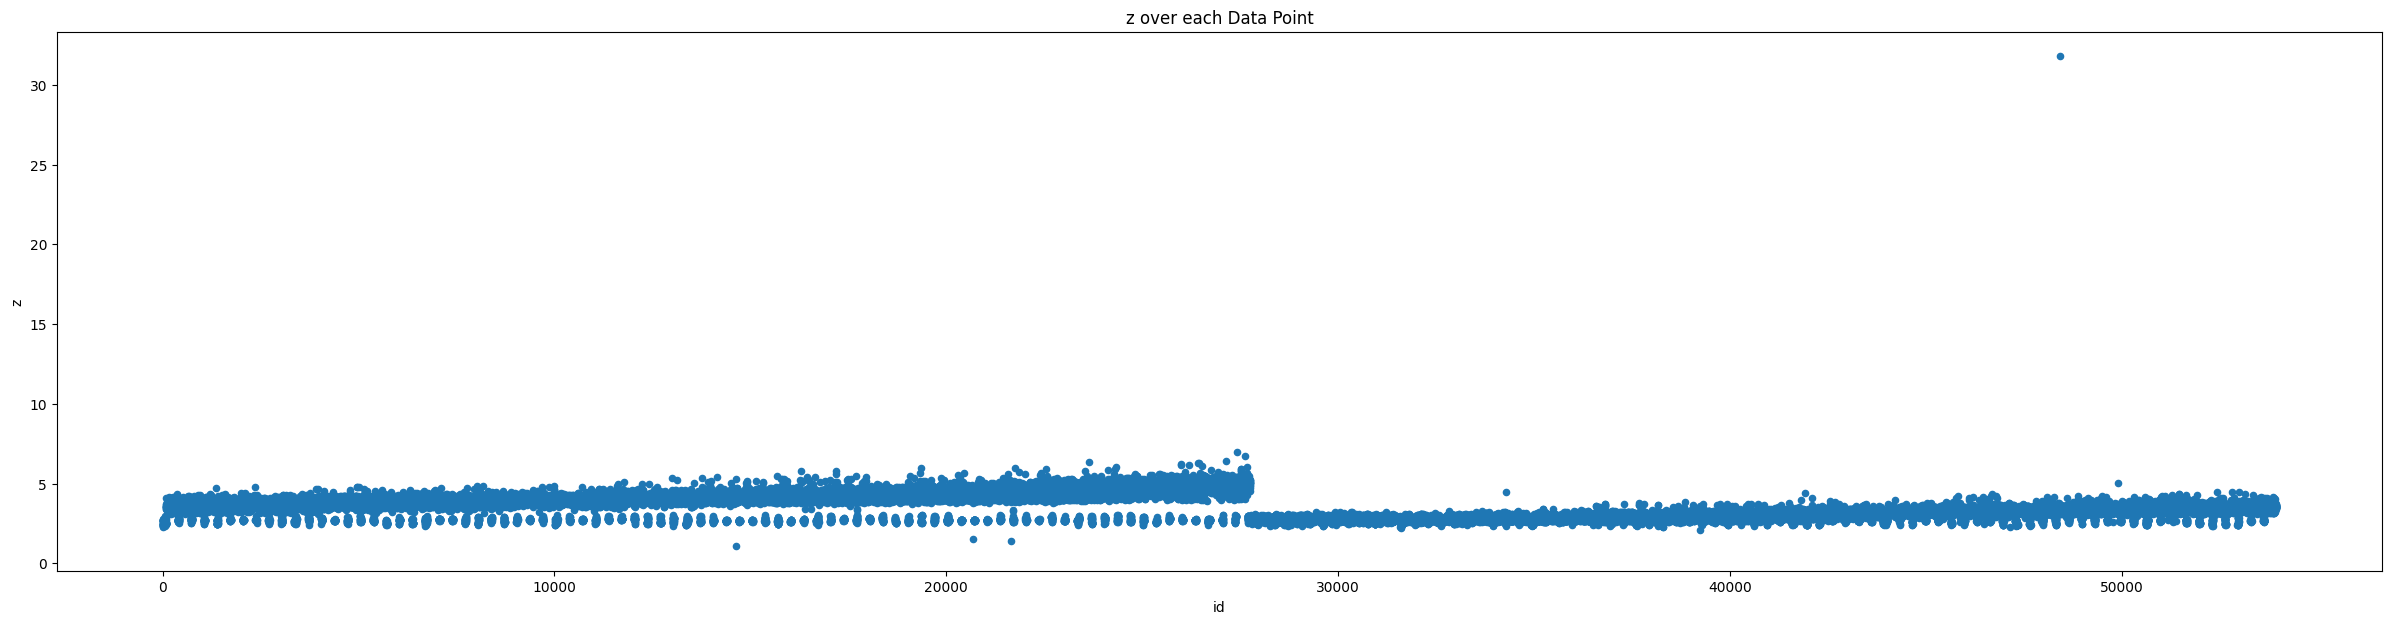

In [13]:
diamond_data[["id","z"]].plot(kind = "scatter",x = "id",y = "z", title = "z over each Data Point", figsize = (30,7))

**Removed outliers from z**

In [14]:
diamond_data = diamond_data[diamond_data["z"] < 10]

In [15]:
diamond_data = diamond_data[diamond_data["z"] > 1.6]

<Axes: title={'center': 'z over each Data Point'}, xlabel='id', ylabel='z'>

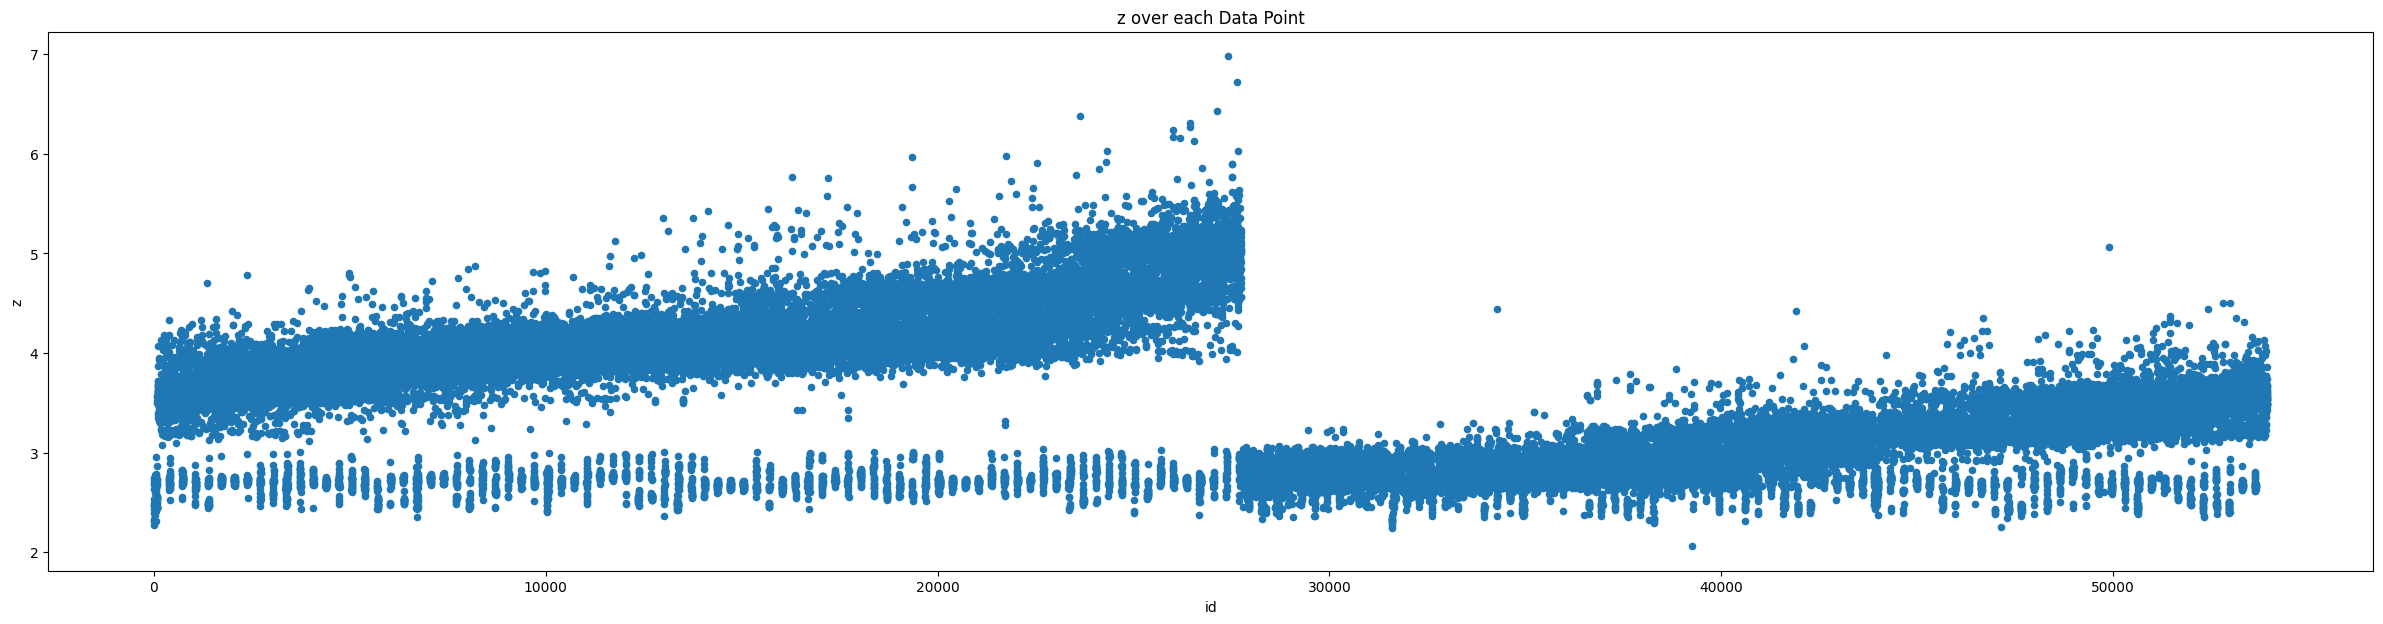

In [16]:
diamond_data[["id","z"]].plot(kind = "scatter",x = "id",y = "z", title = "z over each Data Point", figsize = (30,7))

**Created a scatterplot to show where the depth falls for each data point in the dataset. Noted that there appear to be a few outliers on the top and bottom. Additionally, looking at how the data is distributed, it doesn't appear to match the layout as the previous scatterplots.**


<Axes: title={'center': 'Depth over each Data Point'}, xlabel='id', ylabel='depth'>

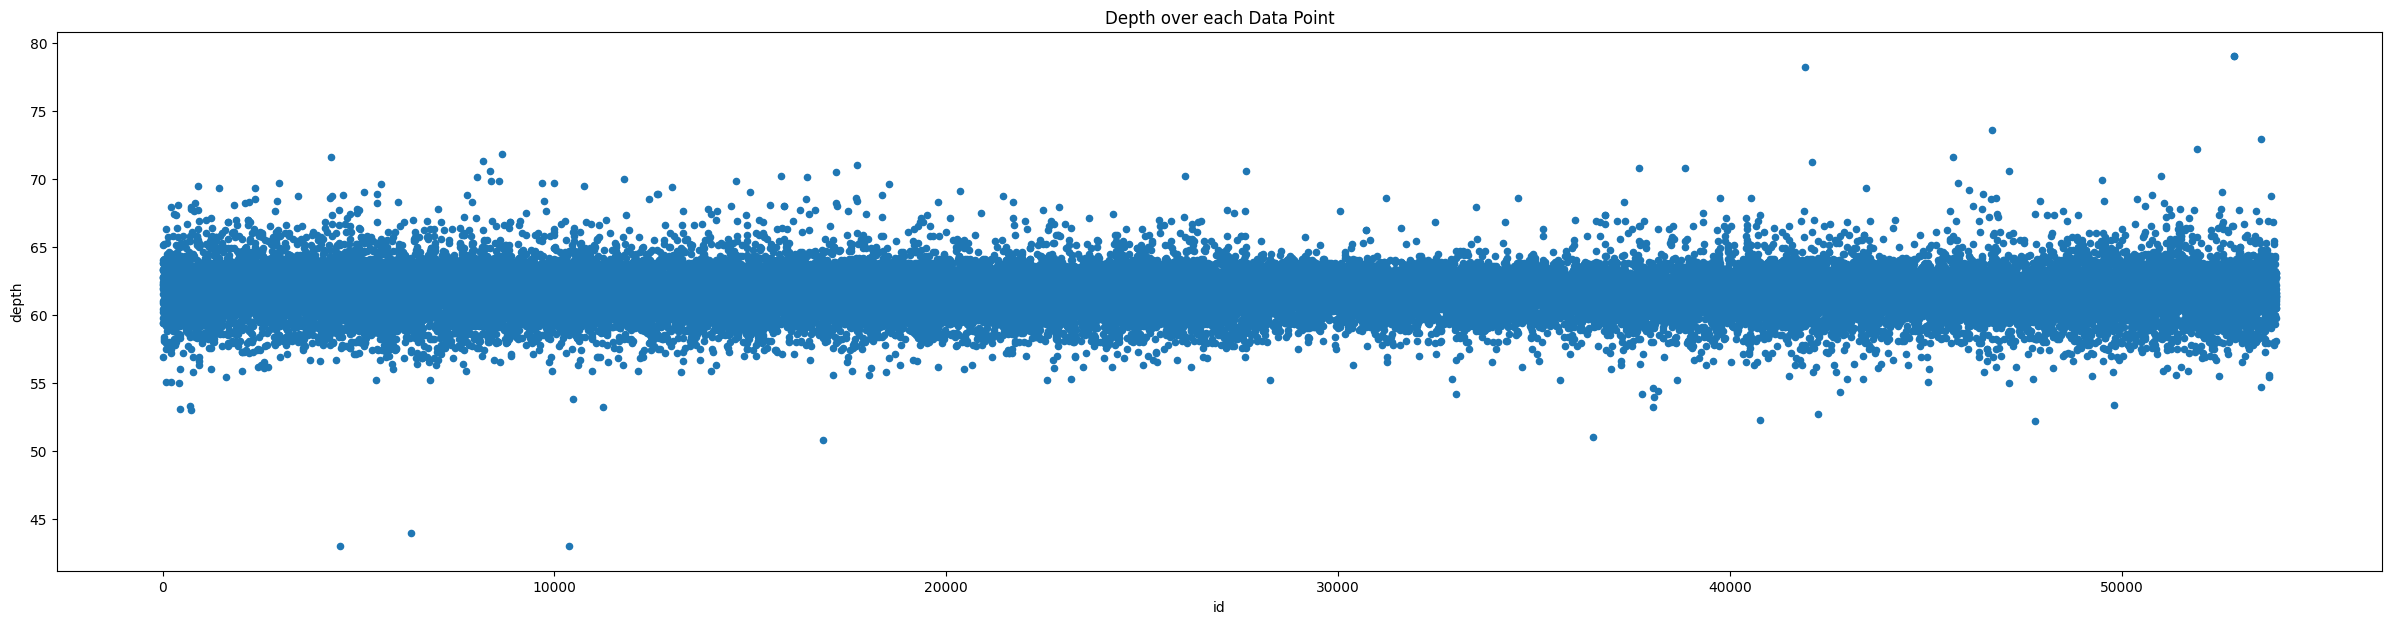

In [17]:
diamond_data[["id","depth"]].plot(kind = "scatter",x = "id",y = "depth", title = "Depth over each Data Point", figsize = (30,7))

**Removed outliers from Depth**

In [18]:
diamond_data = diamond_data[diamond_data["depth"] > 50]

In [19]:
diamond_data = diamond_data[diamond_data["depth"] < 75]

<Axes: title={'center': 'Depth over each Data Point'}, xlabel='id', ylabel='depth'>

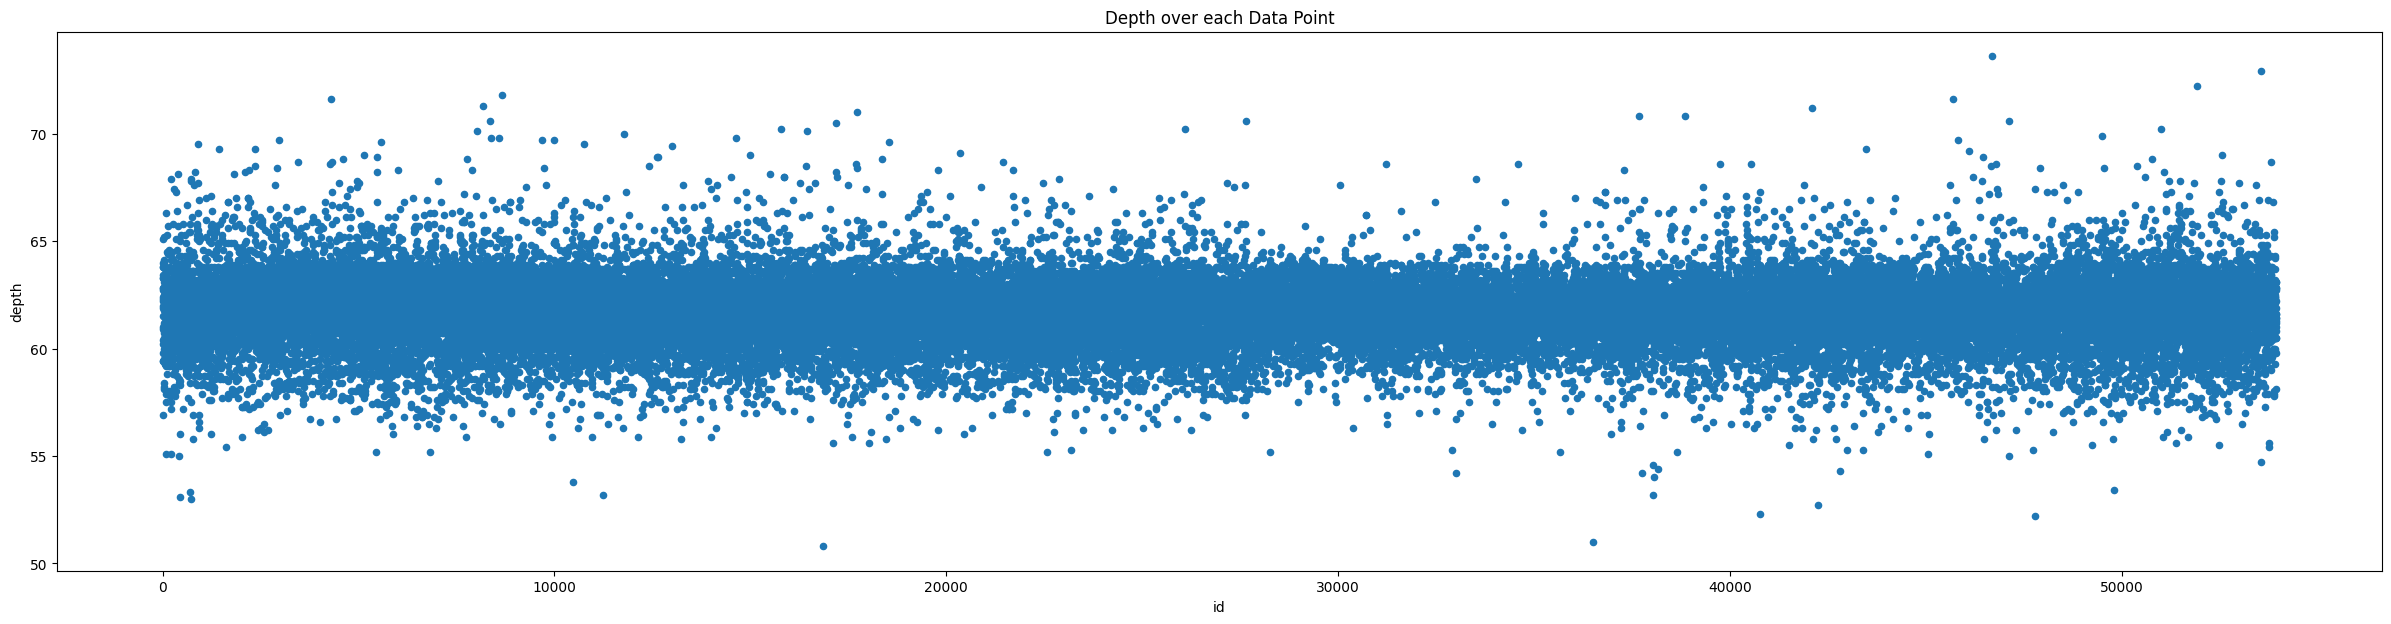

In [20]:
diamond_data[["id","depth"]].plot(kind = "scatter",x = "id",y = "depth", title = "Depth over each Data Point", figsize = (30,7))

**Created a scatterplot to show where the table falls for each data point in the dataset. Noted that there appear to be a few outliers on the top and bottom. Additionally, looking at how the data is distributed, it doesn't appear to match the layout as the previous scatterplots.**

<Axes: title={'center': 'Table over each Data Point'}, xlabel='id', ylabel='table'>

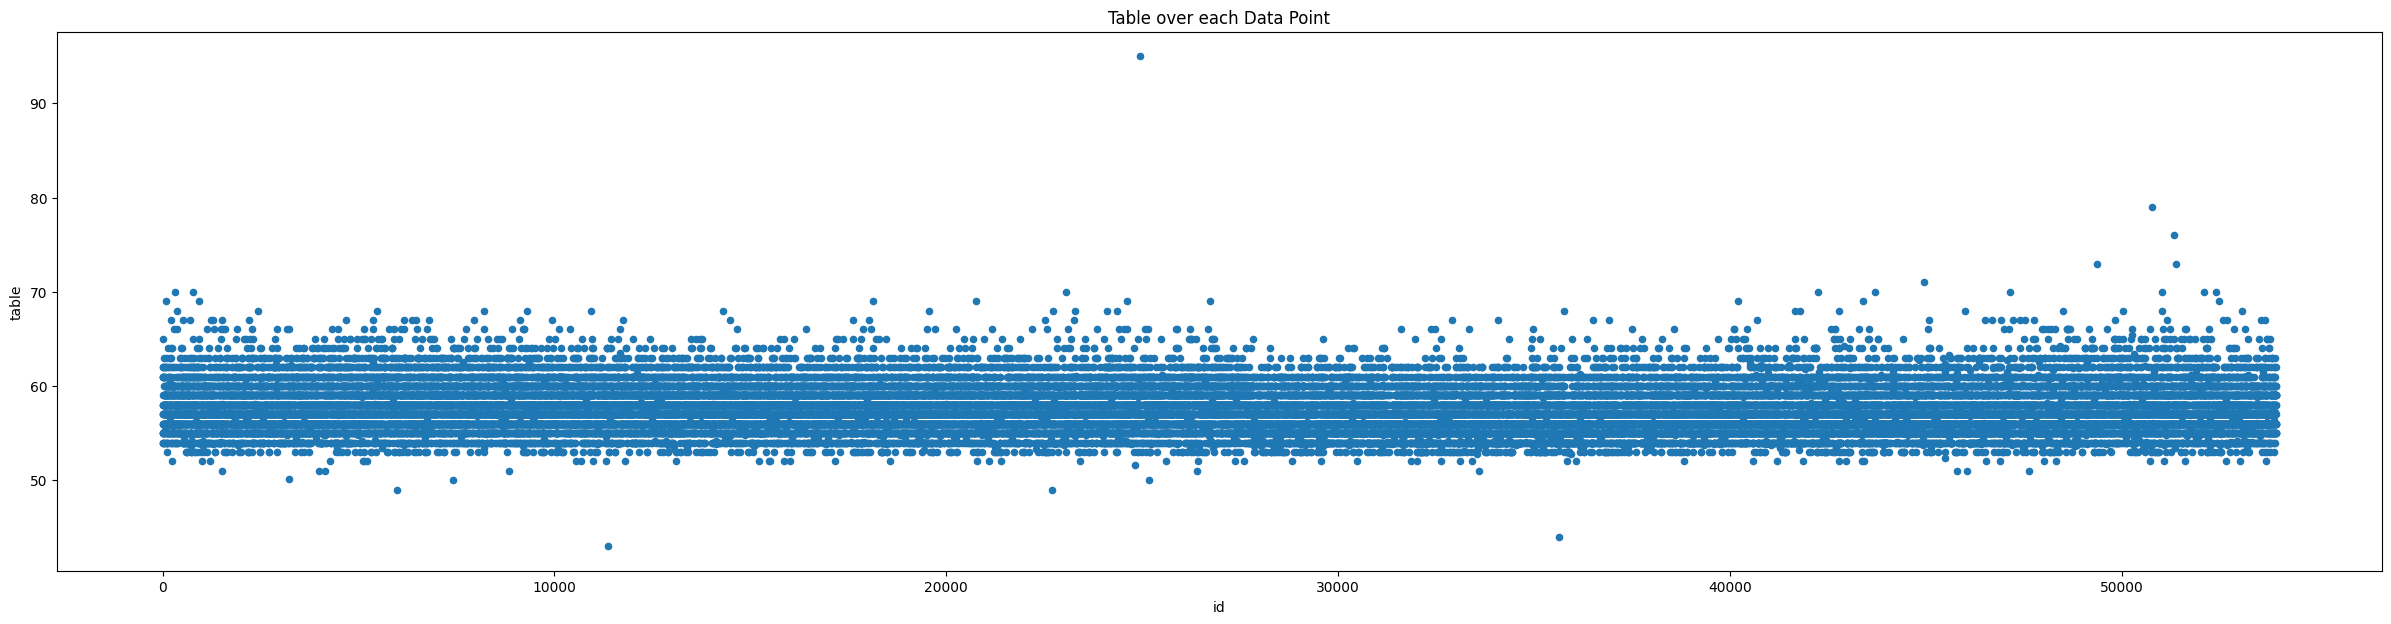

In [21]:
diamond_data[["id","table"]].plot(kind = "scatter",x = "id",y = "table", title = "Table over each Data Point", figsize = (30,7))

**Removed outliers from table**

In [22]:
diamond_data = diamond_data[diamond_data["table"] < 75]

In [23]:
diamond_data = diamond_data[diamond_data["table"] > 45]

<Axes: title={'center': 'Table over each Data Point'}, xlabel='id', ylabel='table'>

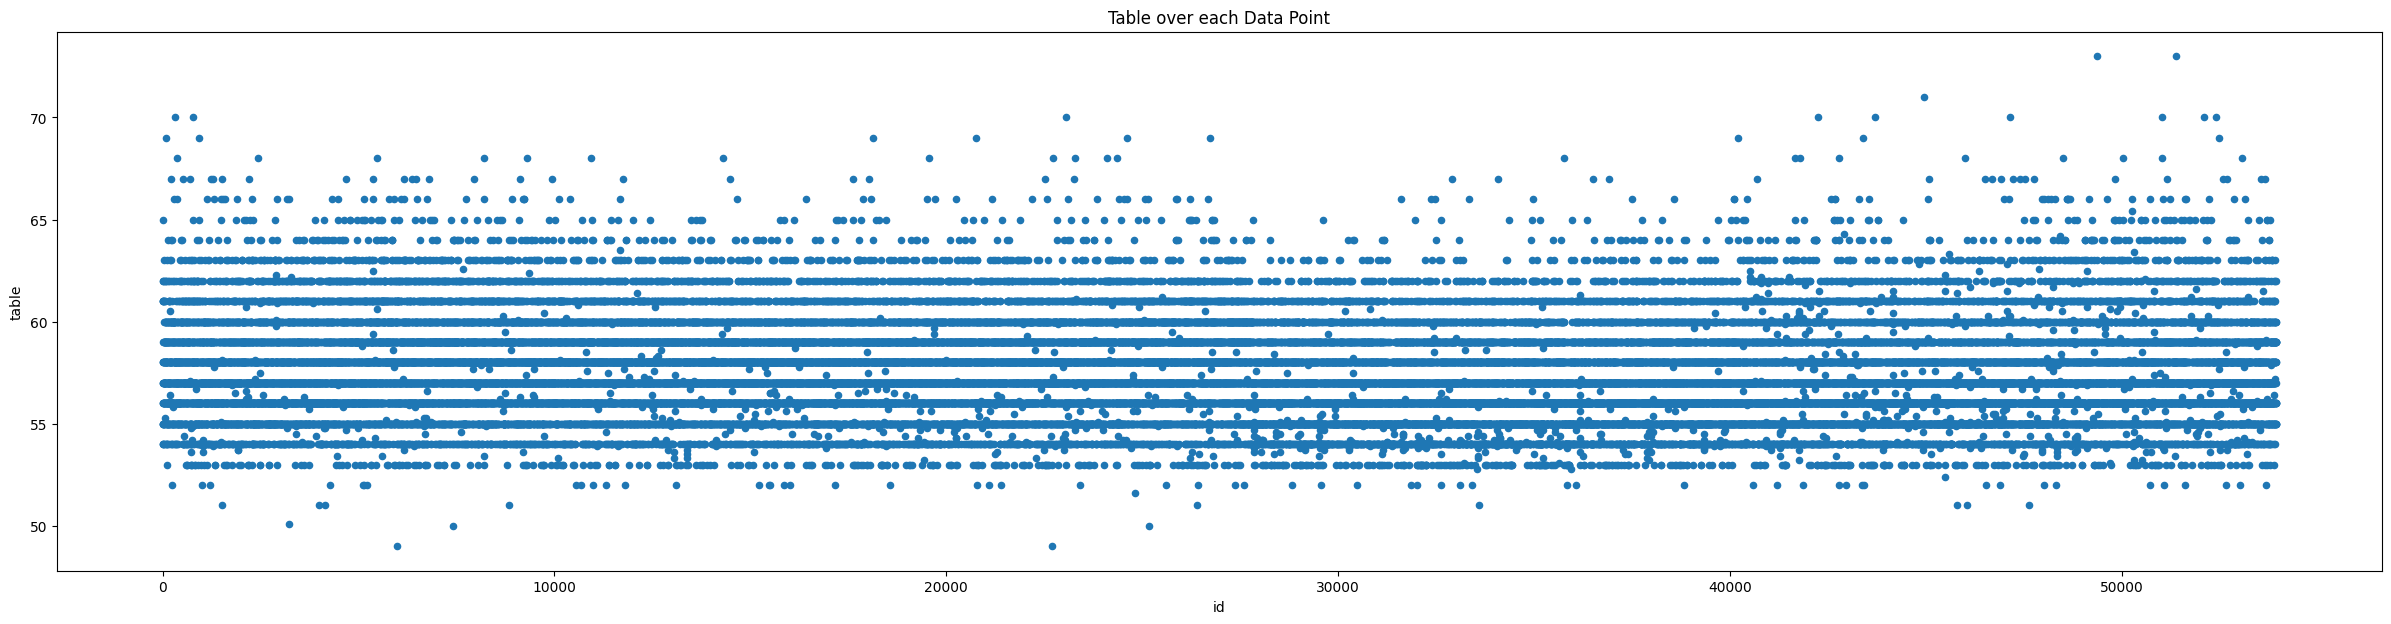

In [24]:
diamond_data[["id","table"]].plot(kind = "scatter",x = "id",y = "table", title = "Table over each Data Point", figsize = (30,7))

**Created a scatterplot to compare diamond prices by carats. Looking at the chart, it looks like the diamond prices tend to increase when the carat increases.**

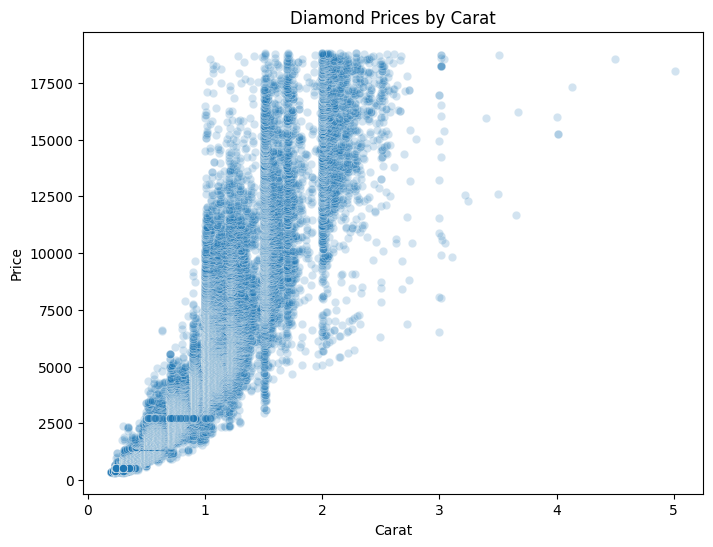

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x ='carat', y ='price', data = diamond_data, alpha=.2)
plt.title("Diamond Prices by Carat")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

**Created a scatterplot to compare diamond prices by x. Looking at the chart, it looks like the diamond prices tend to increase when the x increases.**

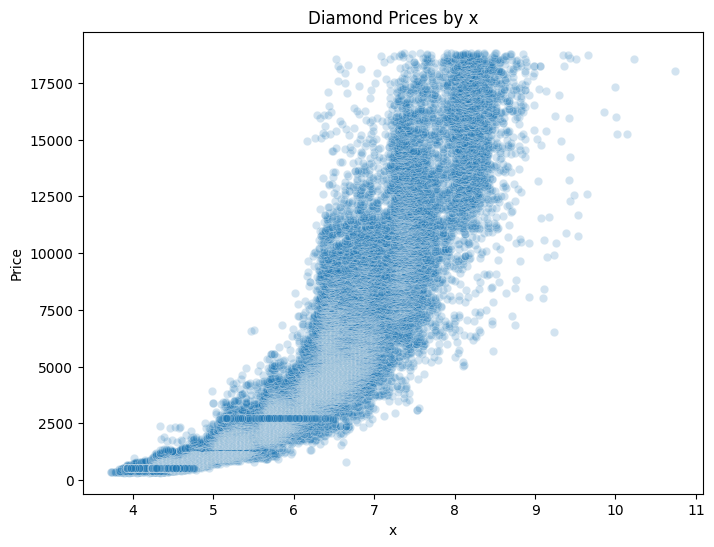

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x ='x', y ='price', data = diamond_data, alpha=.2)
plt.title("Diamond Prices by x")
plt.xlabel("x")
plt.ylabel("Price")
plt.show()

**Created a scatterplot to compare diamond prices by y. Looking at the chart, it looks like the diamond prices tend to increase when y increases.**

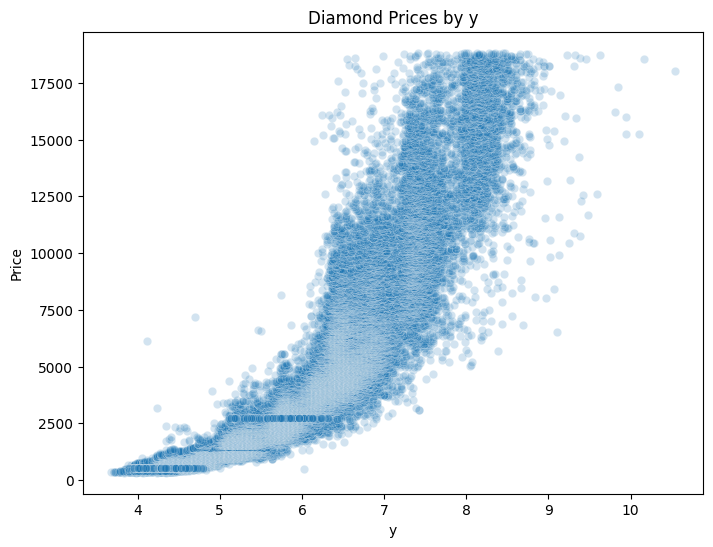

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x ='y', y ='price', data = diamond_data, alpha=.2)
plt.title("Diamond Prices by y")
plt.xlabel("y")
plt.ylabel("Price")
plt.show()

**Created a scatterplot to compare diamond prices by z. Looking at the chart, it looks like the diamond prices tend to increase when z increases.**

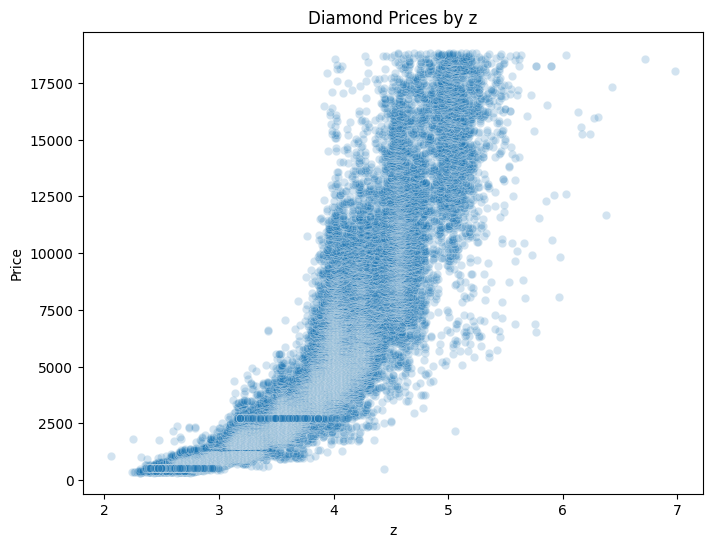

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x ='z', y ='price', data = diamond_data, alpha=.2)
plt.title("Diamond Prices by z")
plt.xlabel("z")
plt.ylabel("Price")
plt.show()

**Created a scatterplot to compare diamond prices by depth. Looking at the chart, it looks like the price is not affected by the depth of a diamond.**

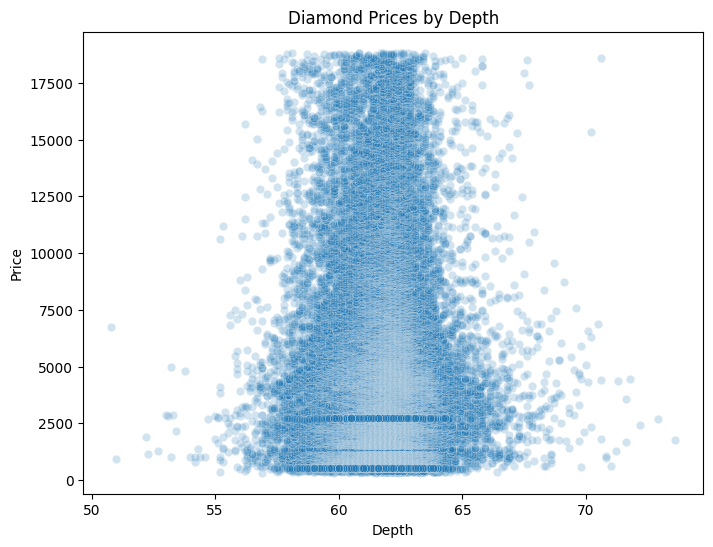

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x ='depth', y ='price', data = diamond_data, alpha=.2)
plt.title("Diamond Prices by Depth")
plt.xlabel("Depth")
plt.ylabel("Price")
plt.show()

**Created a scatterplot to compare diamond prices by table. Looking at the chart, it looks like the price is not affected by the table of a diamond.**

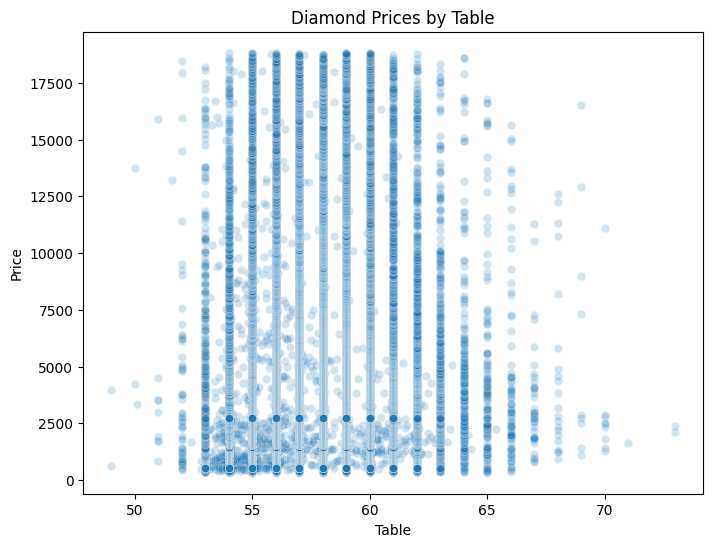

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x ='table', y ='price', data = diamond_data, alpha=.2)
plt.title("Diamond Prices by Table")
plt.xlabel("Table")
plt.ylabel("Price")
plt.show()

**Created a heatmap to see how correlated the features are using kendall correlation.**

<ipython-input-31-8bedbec1421e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diamond_data.corr(method='kendall'))


Text(0.5, 1.0, 'Feature Correlation')

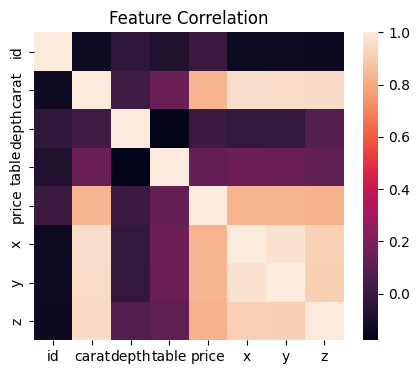

In [31]:
plt.subplots(figsize=(5,4))
sns.heatmap(diamond_data.corr(method='kendall'))
plt.title("Feature Correlation")

**Created a boxplot to visualize the distribution for the price of each diamond based on the cut. Additionally created a barplot of the distribution of the data based on the cut.**

In [32]:
cut_count=diamond_data.groupby("cut", as_index=False).count()

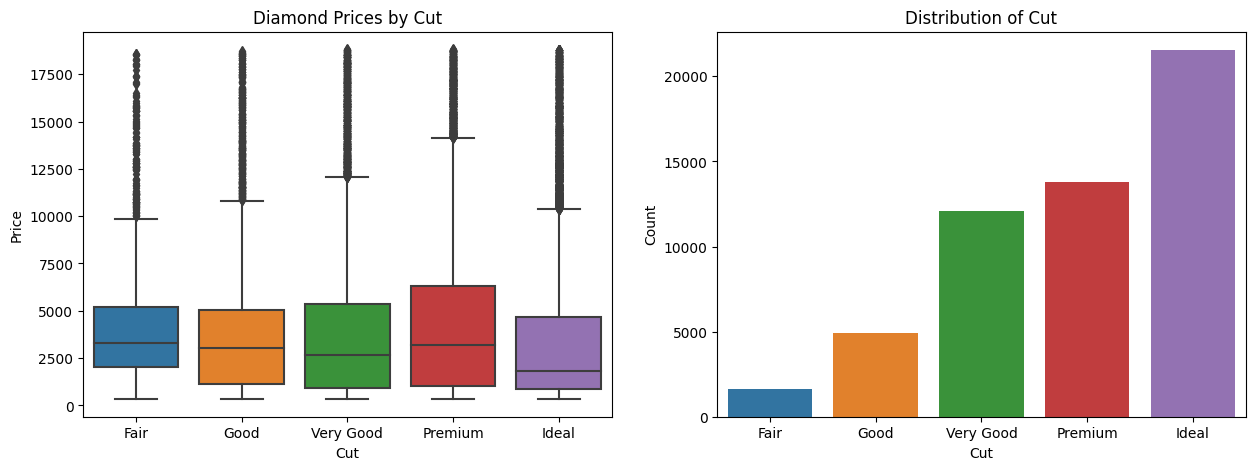

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
sns.boxplot(ax=axes[0], x ='cut', y ='price', data = diamond_data, order=['Fair', 'Good', 'Very Good', "Premium", "Ideal"])
axes[0].set_title("Diamond Prices by Cut")
axes[0].set(xlabel='Cut', ylabel='Price')
sns.barplot(ax=axes[1], x ='cut', y = "id", data = cut_count, order=['Fair', 'Good', 'Very Good', "Premium", "Ideal"])
axes[1].set_title("Distribution of Cut")
axes[1].set(xlabel='Cut', ylabel='Count')
plt.show()

In [34]:
cut_fair = diamond_data[diamond_data['cut']=='Fair']["price"]
cut_good = diamond_data[diamond_data['cut']=='Good']["price"]
cut_verygood = diamond_data[diamond_data['cut']=='Very Good']["price"]
cut_premium = diamond_data[diamond_data['cut']=='Premium']["price"]
cut_ideal = diamond_data[diamond_data['cut']=='Ideal']["price"]

**Conducted an ANOVA test to determine the statistical significance of cut. Noted that this has a p score close to 0, meaning that their relationship is statistically significant.**

In [35]:
f_oneway(cut_fair, cut_good, cut_verygood, cut_premium, cut_ideal)

F_onewayResult(statistic=174.71522224598462, pvalue=5.737805153898144e-149)

**Created a boxplot to visualize the distribution for the price of each diamond based on the color. Additionally created a barplot of the distribution of the data based on the color.**

In [36]:
color_count=diamond_data.groupby("color", as_index=False).count()

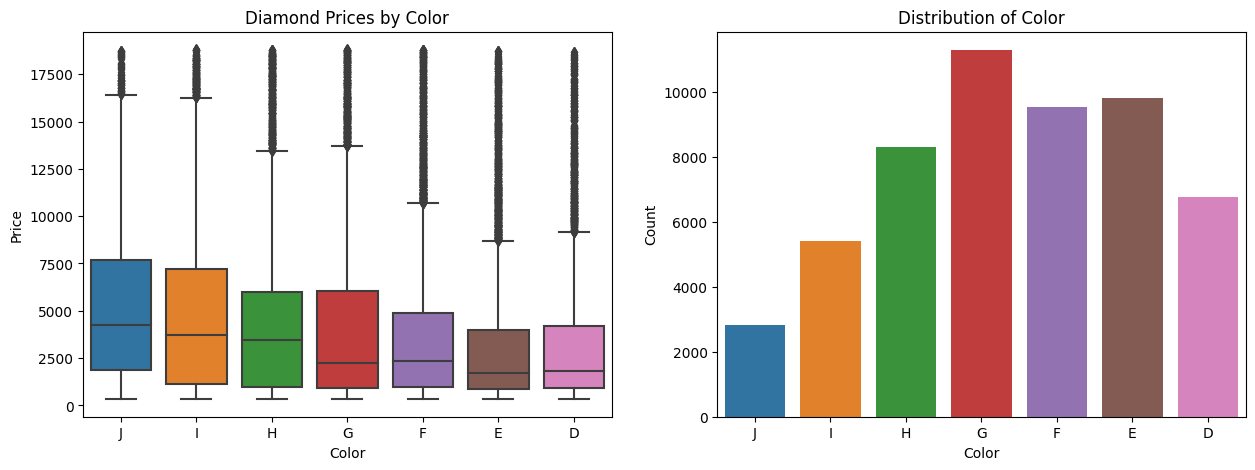

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
sns.boxplot(ax=axes[0], x ='color', y ='price', data = diamond_data, order=['J','I','H','G','F','E','D'])
axes[0].set_title("Diamond Prices by Color")
axes[0].set(xlabel='Color', ylabel='Price')
sns.barplot(ax=axes[1], x ='color', y = "id", data = color_count, order=['J','I','H','G','F','E','D'])
axes[1].set_title("Distribution of Color")
axes[1].set(xlabel='Color', ylabel='Count')
plt.show()

**Conducted an ANOVA test to determine the statistical significance of color. Noted that this has a p score of 0, meaning that their relationship is statistically significant.**

In [38]:
color_j = diamond_data[diamond_data['color']=='J']["price"]
color_i = diamond_data[diamond_data['color']=='I']["price"]
color_h = diamond_data[diamond_data['color']=='H']["price"]
color_g = diamond_data[diamond_data['color']=='G']["price"]
color_f = diamond_data[diamond_data['color']=='F']["price"]
color_e = diamond_data[diamond_data['color']=='E']["price"]
color_d = diamond_data[diamond_data['color']=='D']["price"]

In [39]:
f_oneway(color_j, color_i, color_h, color_g, color_f, color_e, color_d)

F_onewayResult(statistic=289.36056475688724, pvalue=0.0)

**Created a boxplot to visualize the distribution for the price of each diamond based on the clarity. Additionally created a barplot of the distribution of the data based on the clarity.**

In [40]:
clarity_count=diamond_data.groupby("clarity", as_index=False).count()

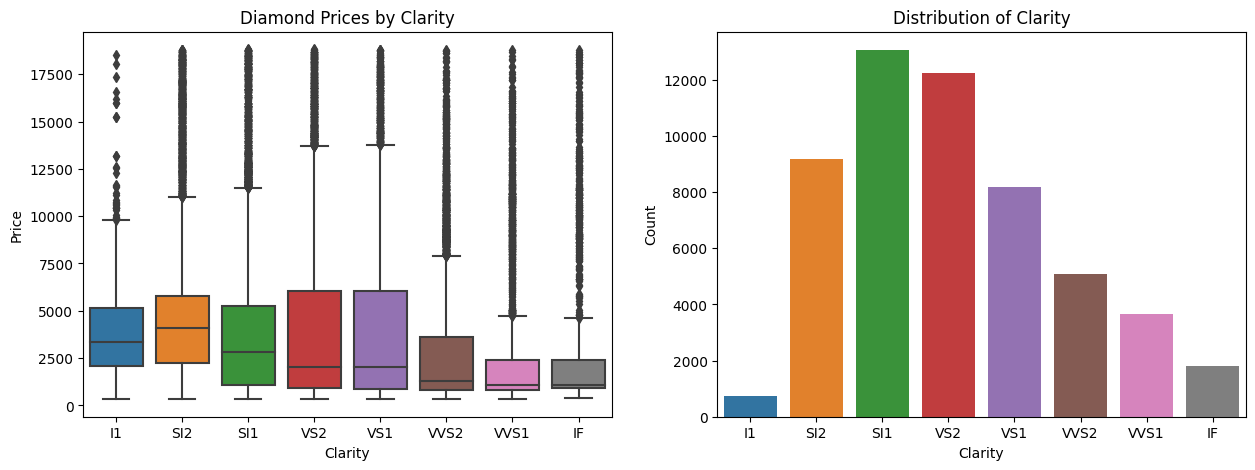

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
sns.boxplot(ax=axes[0], x ='clarity', y ='price', data = diamond_data, order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
axes[0].set_title("Diamond Prices by Clarity")
axes[0].set(xlabel='Clarity', ylabel='Price')
sns.barplot(ax=axes[1], x ='clarity', y = "id", data = clarity_count, order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
axes[1].set_title("Distribution of Clarity")
axes[1].set(xlabel='Clarity', ylabel='Count')
plt.show()

In [42]:
clarity_I1 = diamond_data[diamond_data['clarity']=='I1']["price"]
clarity_SI2 = diamond_data[diamond_data['clarity']=='SI2']["price"]
clarity_SI1 = diamond_data[diamond_data['clarity']=='SI1']["price"]
clarity_VS2 = diamond_data[diamond_data['clarity']=='VS2']["price"]
clarity_VS1 = diamond_data[diamond_data['clarity']=='VS1']["price"]
clarity_VVS2 = diamond_data[diamond_data['clarity']=='VVS2']["price"]
clarity_VVS1 = diamond_data[diamond_data['clarity']=='VVS1']["price"]
clarity_IF = diamond_data[diamond_data['clarity']=='IF']["price"]

**Conducted an ANOVA test to determine the statistical significance of clarity. Noted that this has a p score close to 0, meaning that their relationship is statistically significant.**

In [43]:
f_oneway(clarity_I1, clarity_SI2, clarity_SI1, clarity_VS2, clarity_VS1, clarity_VVS2, clarity_VVS1, clarity_IF)

F_onewayResult(statistic=214.81630336982556, pvalue=3.84786853e-316)

In [44]:
datapath = '/content/drive/MyDrive/Springboard/Capstone 3'
save_file(diamond_data, 'diamond_data_1.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "/content/drive/MyDrive/Springboard/Capstone 3/diamond_data_1.csv"


**EDA Summary**

Steps Performed:

I validated that the datatype of each column is accurate and does not need to be changed.

I checked whether any columns have NA values and determined that there are no columsn with NA values.
I checked all the numeric columns in the data to make sure that there are no errors. All the data looks valid.
I then filtered for all the object type data and checked the values for this data to make sure there are no invalid inputs. Noted that all data looks valid.

Missing Values:

I noted that for columns "x", "y", and "z", there are a few rows with a value of 0. Noted that this is an invalid value and since there were only 20 rows with a 0, decided to drop those rows.

Outliers:

I did not notice any major outliers in the data.